## Two neuron example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

p = int(2) #features
n = int(10000) #examples

## generate some features for training data
X = np.random.rand(n,p)-0.5

## generate labels of the feature vectors with known functions
## Note that sign()/2+0.5 maps output to be 0 or 1, 
## which is the range of the activation fuction
Y1 = np.sign(-2*X[:,[0]]+.2-X[:,[1]])/2+.5
Y2 = np.sign(5*X[:,[0]]**3-X[:,[1]])/2+.5
Y = np.hstack((Y1, Y2))

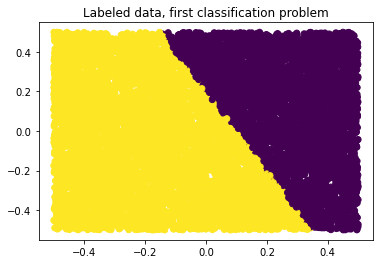

In [2]:
# Plot training data for first classification problem
plt.scatter(X[:,0], X[:,1], c=Y1.flatten())
plt.title('Labeled data, first classification problem')
plt.show()

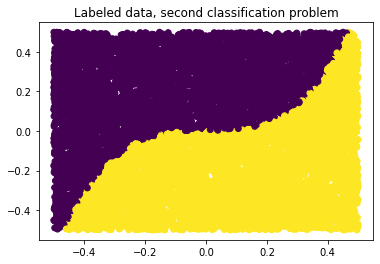

In [3]:
# Plot training data for second classification problem 
plt.scatter(X[:,0], X[:,1], c=Y2.flatten())
plt.title('Labeled data, second classification problem')
plt.show()

#### a) Do you expect that a single neuron will be able to accurately classify data from case 1? Why or why not? Explain the impact of the bias term associated with w_1,0.

#### b) Do you expect that a single neuron will be able to accurately classify data from case 2? Why or why not? Explain the impact of the bias term associated with w_2,0.

In both cases, single neuron will not be effective for accurately classify data.

#### (c) Run SGD for one epoch. This means you cycle through all the training data one time, in random order. Repeat this five times and find the average number of errors in cases 1 and 2.

In [16]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 3 #number of hidden nodes

## initial weights
W = np.random.randn(p+1, q);

alpha = 0.1 #step size
L = 1 #number of epochs

def logsig(_x):
    return 1/(1+np.exp(-_x))

err_c1 = 0
err_c2 = 0
for j in range(5):        
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate 
            Yhat = logsig(Xb[[i],:]@W) 
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Wnew = W - alpha*Xb[[i],:].T@delta
            W = Wnew
        #print('epoch: ', epoch)
        
    print(f'Errors, first classification problem for round {j}:', np.sum(abs(np.round(Yhat[:,0])-Y[:,0])))   
    err_c1 += np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
    
    print(f'Errors, second classification problem for round {j}:', np.sum(abs(np.round(Yhat[:,1])-Y[:,1])))
    print()
    err_c2 += np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
    
        
print("Average classifier 1 errors:", err_c1 / L)
print("Average classifier 2 errors:", err_c2 / L)

Errors, first classification problem for round 0: 3963.0
Errors, second classification problem for round 0: 4975.0

Errors, first classification problem for round 1: 6037.0
Errors, second classification problem for round 1: 5025.0

Errors, first classification problem for round 2: 6037.0
Errors, second classification problem for round 2: 4975.0

Errors, first classification problem for round 3: 3963.0
Errors, second classification problem for round 3: 5025.0

Errors, first classification problem for round 4: 3963.0
Errors, second classification problem for round 4: 4975.0

Average classifier 1 errors: 4792.6
Average classifier 2 errors: 4995.0


In [17]:
## Final predicted labels (on training data)
H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
Yhat = logsig(Xb@W)

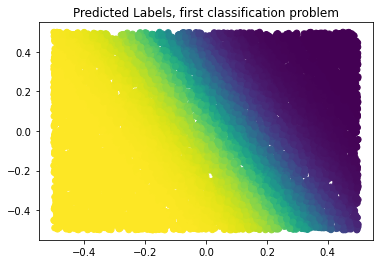

In [18]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,0])
plt.title('Predicted Labels, first classification problem')
plt.show()

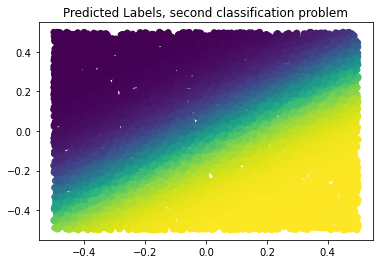

In [19]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,1])
plt.title('Predicted Labels, second classification problem')
plt.show()

#### d) Run SGD over twenty epochs. This means you cycle through all the training data twenty times, in random order. Repeat this five times and find the average number of errors in cases 1 and 2.

In [20]:
## Train NN
Xb = np.hstack((np.ones((n,1)), X))
q = np.shape(Y)[1] #number of classification problems
M = 3 #number of hidden nodes

## initial weights
W = np.random.randn(p+1, q);

alpha = 0.1 #step size
L = 20 #number of epochs

def logsig(_x):
    return 1/(1+np.exp(-_x))

err_c1 = 0
err_c2 = 0
for j in range(5):        
    for epoch in range(L):
        ind = np.random.permutation(n)
        for i in ind:
            # Forward-propagate 
            Yhat = logsig(Xb[[i],:]@W) 
             # Backpropagate
            delta = (Yhat-Y[[i],:])*Yhat*(1-Yhat)
            Wnew = W - alpha*Xb[[i],:].T@delta
            W = Wnew
        #print('epoch: ', epoch)
        
    print(f'Errors, first classification problem for round {j}:', np.sum(abs(np.round(Yhat[:,0])-Y[:,0])))   
    err_c1 += np.sum(abs(np.round(Yhat[:,0])-Y[:,0]))
    
    print(f'Errors, second classification problem for round {j}:', np.sum(abs(np.round(Yhat[:,1])-Y[:,1])))
    print()
    err_c2 += np.sum(abs(np.round(Yhat[:,1])-Y[:,1]))
    
        
print("Average classifier 1 errors:", err_c1 / L)
print("Average classifier 2 errors:", err_c2 / L)

Errors, first classification problem for round 0: 3963.0
Errors, second classification problem for round 0: 4975.0

Errors, first classification problem for round 1: 3963.0
Errors, second classification problem for round 1: 4975.0

Errors, first classification problem for round 2: 3963.0
Errors, second classification problem for round 2: 5025.0

Errors, first classification problem for round 3: 3963.0
Errors, second classification problem for round 3: 4975.0

Errors, first classification problem for round 4: 6037.0
Errors, second classification problem for round 4: 5025.0

Average classifier 1 errors: 1094.45
Average classifier 2 errors: 1248.75


In [24]:
## Final predicted labels (on training data)
H = logsig(np.hstack((np.ones((n,1)), Xb@W)))
Yhat = logsig(Xb@W)

(10000, 3)
(10000, 3)
(3, 2)


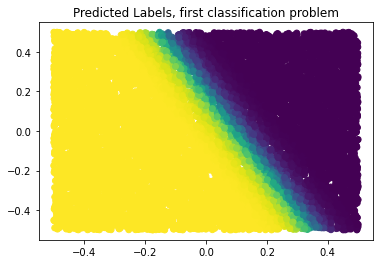

In [22]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,0])
plt.title('Predicted Labels, first classification problem')
plt.show()

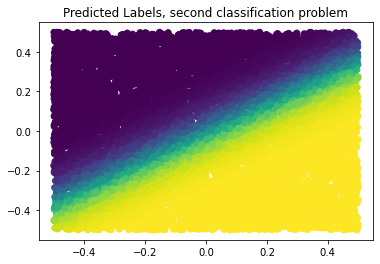

In [23]:
plt.scatter(X[:,0], X[:,1], c=Yhat[:,1])
plt.title('Predicted Labels, second classification problem')
plt.show()

#### e) Explain the differences in classification performance for the two cases that result with both one and twenty epochs.

: The more epochs we have, the better classification peformance we get.